# **OLA 1 - Data Wrangling and Descriptive Statestic**

**Author:** Rabee Abla & Ermin Dzafic  
**Date:** February 23, 2025  
**Course/Organization:** Kunstig intelligens, en, F25  

PS. We used ChatGPT for correcting spelling mistake and make the markdown more representable.

This is the output of the `.describe()` function in **pandas**, which provides summary statistics for the `release_year` column in a dataset.


## 🔍 Breakdown of Statistics:
- **🧮 Count:** `8807` → Total number of entries in the dataset.
- **📅 Mean:** `2014.18` → The average release year.
- **📉 Standard Deviation (std):** `8.82` → Measures the spread of release years. A higher number indicates more variation.
- **📆 Min:** `1925` → Earliest release year.
- **📊 25% (Q1):** `2013` → 25% of entries were released before this year.
- **📍 50% (Median):** `2017` → Half of the entries were released before this year.
- **📈 75% (Q3):** `2019` → 75% of entries were released before this year.
- **🚀 Max:** `2021` → Most recent release year 

# 🛠 Handling Missing Values & Outliers

## 🔍 Identifying Columns with Missing Values
We analyzed missing values in each column:

- ✅ **No missing values:** `show_id`, `type`, `title`, `release_year`, `listed_in`, `description`
- ❌ **Missing values present:**
  - `director`: **2,634** missing values
  - `cast`: **825** missing values
  - `country`: **831** missing values
  - `date_added`: **10** missing values
  - `rating`: **4** missing values
  - `duration`: **3** missing values  

📌 **Threshold for Dropping Columns:**  
Since no column contains more than **50% missing values**, no columns need to be removed.  
Given **8,807 rows**, a column would be considered for removal if it had more than:  

\[
50\% \times 8807 = 4403.5
\]

Since no column exceeds **4,403 missing values**, we retain all columns.

---

# 📊 Outlier Detection & Removal

## 1️⃣ Checking Normality with a Histogram
We first used a histogram to visualize the distribution of `release_year`.  
If the data followed a normal distribution, it would exhibit a **bell-shaped curve**.  

🔹 However, our dataset is **right-skewed**:
- Recent years dominate the dataset.
- Older movies (e.g., **1925**) are far from the majority.

## 2️⃣ Using a Boxplot for Outlier Detection  
A **boxplot** helps us visually detect outliers and understand the distribution of `release_year`.  

📌 **Key Observations:**
- **Outliers Identified:** Dots outside the whiskers represent outliers (mostly **before 2004**).
- **Main Data Range:** Most content was released between **2004 and 2021** (Interquartile Range, IQR).
- **Older Release Years as Outliers:**  
  Films released **between 1925 and 2003** are statistical outliers as they differ significantly from the majority.

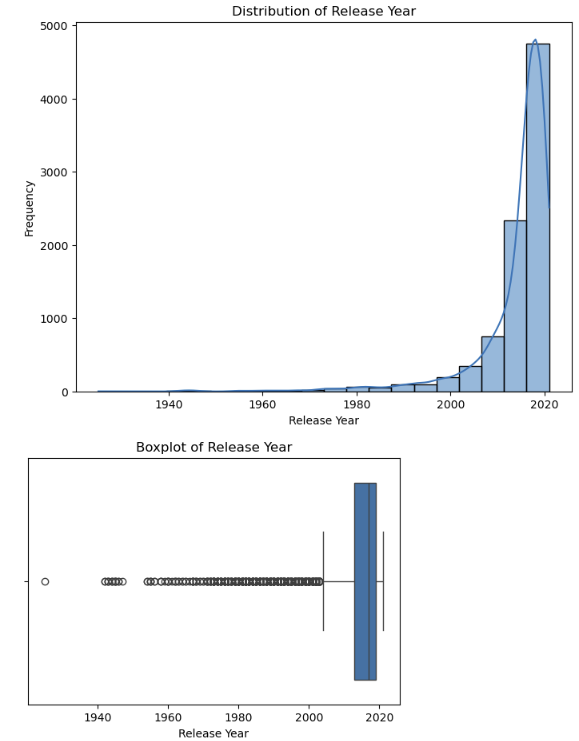

### 🛠 Applying IQR-Based Outlier Removal
Since the distribution is **non-normal**, we use the **IQR method** instead of Z-score-based outlier detection.  

1. **Applied 1.5 × IQR**, removing extreme outliers (**before 2004**).  
2. **New outliers (2005–2008) appeared** due to shifting quartiles.  
3. **Recalculated IQR on the cleaned dataset** and adjusted outlier detection using **1.8 × IQR** to balance data retention.  
4. **Final Boxplot:** Ensured extreme outliers were removed **without distorting valid data**.

📌 **Visualizations after each step:**  
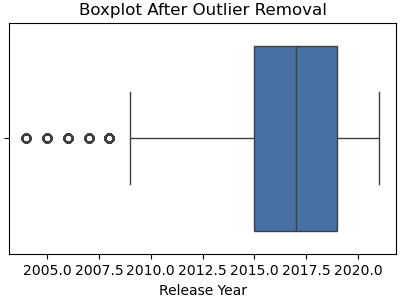  
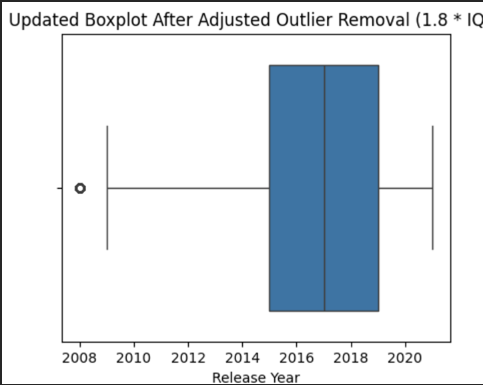

---

# 📈 Data Visualization & Descriptive Statistics

## 🔹 Distribution Analysis
We used **Matplotlib** and **Seaborn** to visualize the distribution of both **quantitative** and **categorical** variables.

🔹 **Skewness:**
- The distribution is **slightly left-skewed (-0.90)**, meaning it is well-balanced for analysis.
- The **IQR (2015–2019)** suggests most films were released within this period, making it a strong representative sample.

📌 **Q-Q Plot Analysis:**
- The Q-Q plot confirms that our data is **not normally distributed**.
- The deviation from the reference line suggests **left-skewness**.

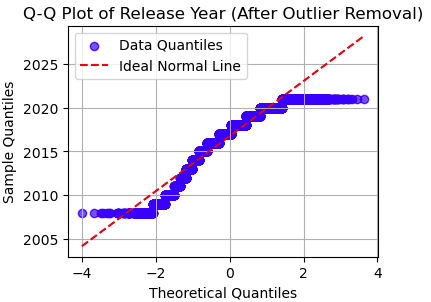

---

## 📊 Descriptive Statistics  

### 1️⃣ Numerical Features:
- **Mean runtime:** **318.39 minutes**
- **Median runtime:** **111 minutes** (Half of the content is shorter than this, half is longer).
- **Standard deviation:** **496.67 minutes** (High variation confirms extreme outliers).

### 2️⃣ Categorical Features:
- **Medium Count:** **6,500 entries**
- **High Count:** **830 entries**
- **Low Count:** **430 entries**

## 🛠 Boxplots for Outlier Identification
We used **Seaborn** to generate box plots for numerical features.

🔹 **Observations from Box Plot:**
- Most runtimes are **under 1,000 minutes**.
- **Extreme outliers exist**, creating a **right-skewed** distribution.
- The **median runtime (111 minutes)** is marked inside the box.

### 📌 Visualizations:
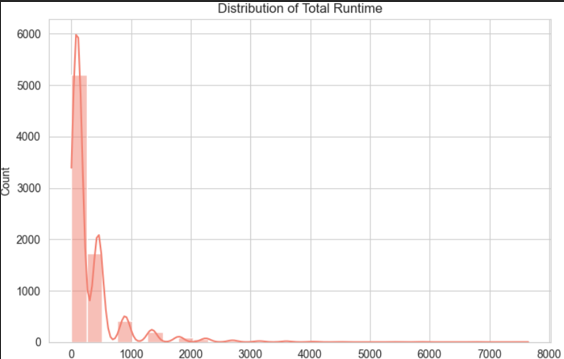  
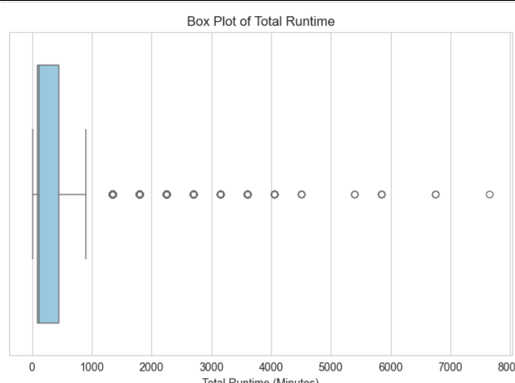

# Insights

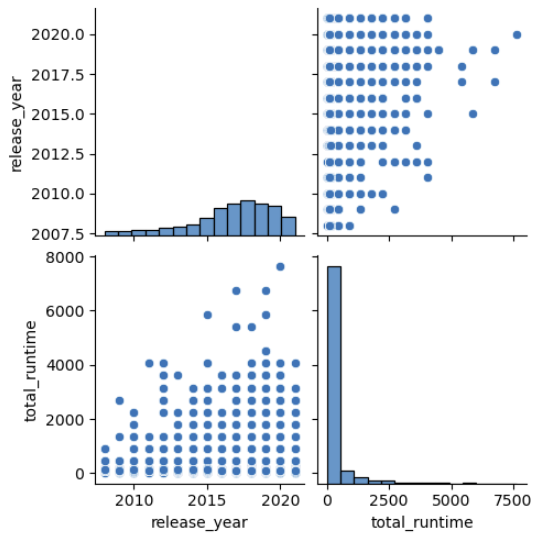

1. In the Top-Right scatter plot (total_runtime vs. release_year), we see stacked dots, meaning multiple movies/shows have the same release year and similar runtimes.
2. This clustering suggests that certain runtime lengths (e.g., 90–120 minutes for movies or ~30-minute episodes for shows) are common industry standards.
3. However, some outliers with much longer runtimes indicate exceptions, possibly long-running TV series or incorrect data entries.


In [5]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv") 
print("Head") 
print(df.head()) 
print("Describe") 
print(df.describe()) 
print("Info.")
print(df.info())

Head
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021   

In [6]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [7]:
df.to_excel("AllData.xlsx", index=False)

In [8]:
print(df['date_added'].head(10))
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
print(df['date_added'].head(10))
df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added_numeric'] = (df['date_added'] - df['date_added'].min()).dt.days
df['date_added_numeric'] = df['date_added_numeric'].interpolate(method='linear')
df['date_added'] = df['date_added'].min() + pd.to_timedelta(df['date_added_numeric'], unit='D')

df.drop('date_added_numeric', axis=1, inplace=True)

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
5    September 24, 2021
6    September 24, 2021
7    September 24, 2021
8    September 24, 2021
9    September 24, 2021
Name: date_added, dtype: object
0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
5   2021-09-24
6   2021-09-24
7   2021-09-24
8   2021-09-24
9   2021-09-24
Name: date_added, dtype: datetime64[ns]


In [9]:
missing_values = df.isnull().sum()
print("Missing values in column: date_added'")
print(missing_values['date_added'])


Missing values in column: date_added'
0


In [10]:
df['show_id'] = df['show_id'].astype(str)
ids_to_fix = ['s5542', 's5814', 's5795']
df.loc[df['show_id'].isin(ids_to_fix), 'duration'] = df.loc[df['show_id'].isin(ids_to_fix), 'rating']

df.loc[df['show_id'].isin(ids_to_fix), 'rating'] = None



In [11]:
filtered_df = df[df['show_id'] == 's5542']
print(filtered_df)

     show_id   type            title    director        cast        country  \
5541   s5542  Movie  Louis C.K. 2017  Louis C.K.  Louis C.K.  United States   

     date_added  release_year rating duration listed_in  \
5541 2017-04-04          2017   None   74 min    Movies   

                                            description  
5541  Louis C.K. muses on religion, eternal love, gi...  


In [12]:
mode_category = df['rating'].mode()[0]  
df['rating'] = df['rating'].fillna(mode_category)
print(mode_category)

mode_rating = df['rating'].mode()[0]  
df['rating'] = df['rating'].fillna(mode_rating)

print(df[['show_id', 'rating']])

TV-MA
     show_id rating
0         s1  PG-13
1         s2  TV-MA
2         s3  TV-MA
3         s4  TV-MA
4         s5  TV-MA
...      ...    ...
8802   s8803      R
8803   s8804  TV-Y7
8804   s8805      R
8805   s8806     PG
8806   s8807  TV-14

[8807 rows x 2 columns]


In [13]:
mode_category = df['country'].mode()[0]  
df['country'] = df['country'].fillna(mode_category)
print(mode_category)

mode_rating = df['country'].mode()[0]  
df['country'] = df['country'].fillna(mode_rating)

print(df[['show_id', 'country']])

United States
     show_id        country
0         s1  United States
1         s2   South Africa
2         s3  United States
3         s4  United States
4         s5          India
...      ...            ...
8802   s8803  United States
8803   s8804  United States
8804   s8805  United States
8805   s8806  United States
8806   s8807          India

[8807 rows x 2 columns]


In [14]:
mode_category = df['cast'].mode()[0]  
df['cast'] = df['cast'].fillna(mode_category)
print(mode_category)

mode_rating = df['cast'].mode()[0]  
df['cast'] = df['cast'].fillna(mode_rating)

print(df[['show_id', 'cast']])

David Attenborough
     show_id                                               cast
0         s1                                 David Attenborough
1         s2  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2         s3  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3         s4                                 David Attenborough
4         s5  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
...      ...                                                ...
8802   s8803  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803   s8804                                 David Attenborough
8804   s8805  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805   s8806  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806   s8807  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...

[8807 rows x 2 columns]


In [15]:
mode_category = df['director'].mode()[0]  
df['director'] = df['director'].fillna(mode_category)
print(mode_category)

mode_rating = df['director'].mode()[0]  
df['director'] = df['director'].fillna(mode_rating)

print(df[['show_id', 'director']])

Rajiv Chilaka
     show_id         director
0         s1  Kirsten Johnson
1         s2    Rajiv Chilaka
2         s3  Julien Leclercq
3         s4    Rajiv Chilaka
4         s5    Rajiv Chilaka
...      ...              ...
8802   s8803    David Fincher
8803   s8804    Rajiv Chilaka
8804   s8805  Ruben Fleischer
8805   s8806     Peter Hewitt
8806   s8807      Mozez Singh

[8807 rows x 2 columns]


In [16]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
df.to_excel("All.xlsx", index=False)


Missing values in each column:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


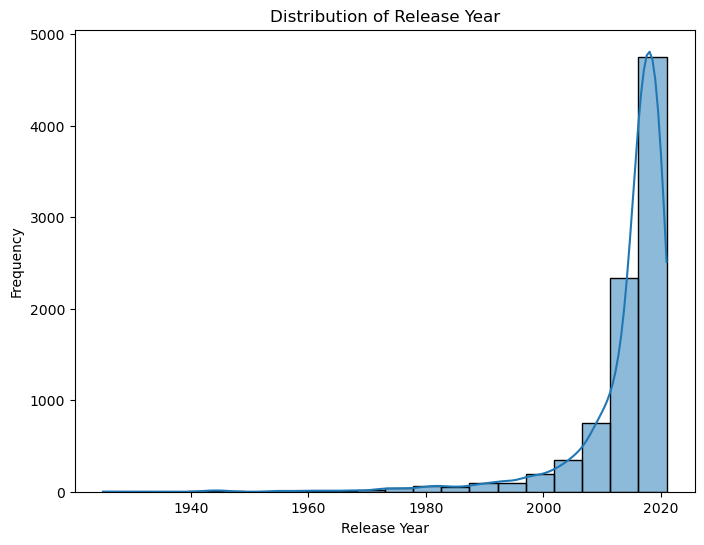

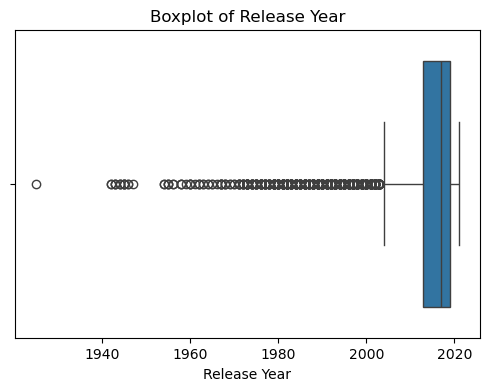

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))  
sns.histplot(df['release_year'], bins=20, kde=True) 
plt.title("Distribution of Release Year")  
plt.xlabel("Release Year") 
plt.ylabel("Frequency") 
plt.show()  


plt.figure(figsize=(6, 4)) 
sns.boxplot(x=df['release_year'])  
plt.title("Boxplot of Release Year")  
plt.xlabel("Release Year")  
plt.show()  




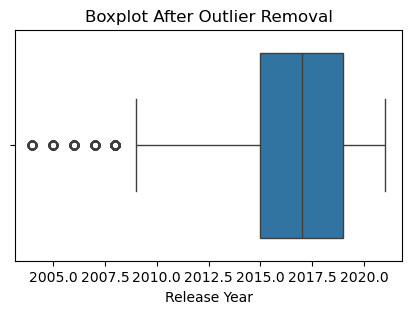

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = df['release_year'].quantile(0.25)  
Q3 = df['release_year'].quantile(0.75)  
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

df_cleaned = df[(df['release_year'] >= lower_bound) & (df['release_year'] <= upper_bound)]

outliers = df[~df.index.isin(df_cleaned.index)]

plt.figure(figsize=(5, 3))
sns.boxplot(x=df_cleaned['release_year'])
plt.title("Boxplot After Outlier Removal")
plt.xlabel("Release Year")
plt.show()

df_cleaned.to_excel("delete.xlsx", index=False) 


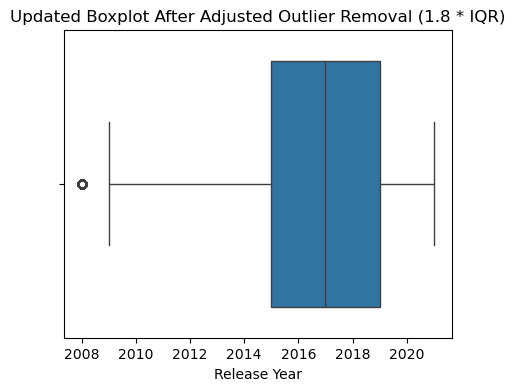

New Lower Bound: 2007.8
New Upper Bound: 2026.2


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1_new = df_cleaned['release_year'].quantile(0.25)  
Q3_new = df_cleaned['release_year'].quantile(0.75) 
IQR_new = Q3_new - Q1_new 


lower_bound_new = Q1_new - 1.8 * IQR_new 
upper_bound_new = Q3_new + 1.8 * IQR_new 

df = df_cleaned[
    (df_cleaned['release_year'] >= lower_bound_new) & 
    (df_cleaned['release_year'] <= upper_bound_new)
]


plt.figure(figsize=(5, 4))
sns.boxplot(x=df['release_year'])
plt.title("Updated Boxplot After Adjusted Outlier Removal (1.8 * IQR)")
plt.xlabel("Release Year")
plt.show()

print(f"New Lower Bound: {lower_bound_new}")
print(f"New Upper Bound: {upper_bound_new}")


In [20]:
df.to_excel("lastData.xlsx", index=False)

-0.9031308657172981
count    7760.000000
mean     2016.756572
std         3.142227
min      2008.000000
25%      2015.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64
Skewness: -0.9031308657172981


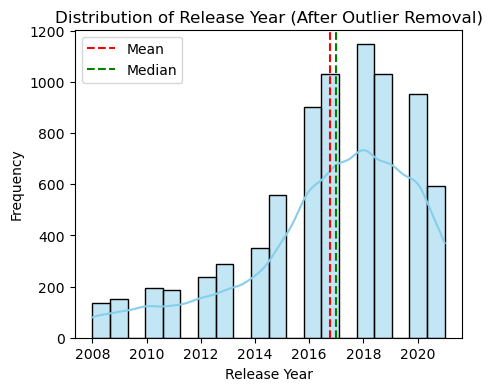

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print(df['release_year'].skew())  
print(df['release_year'].describe()) 
print("Skewness:", df['release_year'].skew())  

plt.figure(figsize=(5, 4))  
sns.histplot(df['release_year'], bins=20, kde=True, color='skyblue')  

plt.axvline(df['release_year'].mean(), color='red', linestyle='dashed', label="Mean")  
plt.axvline(df['release_year'].median(), color='green', linestyle='dashed', label="Median")  

plt.title("Distribution of Release Year (After Outlier Removal)")  
plt.xlabel("Release Year")  
plt.ylabel("Frequency")  
plt.legend()  

plt.show()


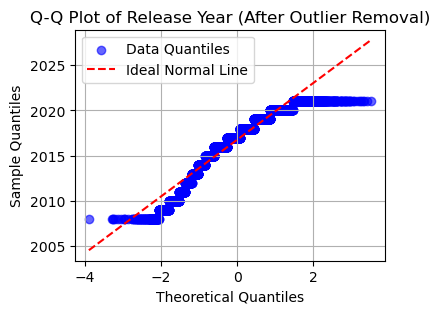

In [22]:
import numpy as np
import matplotlib.pyplot as plt

sorted_data = np.sort(df['release_year'])

n = len(sorted_data)
theoretical_quantiles = np.linspace(0, 1, n)

normal_quantiles = np.quantile(np.random.normal(0, 1, n), theoretical_quantiles)

plt.figure(figsize=(4, 3))
plt.scatter(normal_quantiles, sorted_data, color='blue', alpha=0.6, label="Data Quantiles")
plt.plot(normal_quantiles, normal_quantiles * np.std(sorted_data) + np.mean(sorted_data), 
         color='red', linestyle='dashed', label="Ideal Normal Line")

plt.title("Q-Q Plot of Release Year (After Outlier Removal)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.legend()
plt.grid()
plt.show()


In [23]:
def convert_duration(row):
    if isinstance(row['duration'], str):
        if "min" in row['duration']:  
            return int(row['duration'].replace(" min", ""))
        elif "Season" in row['duration']: 
            try:
                seasons = int(row['duration'].split()[0])  
                return seasons * 10 * 45  
            except ValueError:
                return None  
    return None  

df.loc[:, 'total_runtime'] = df.apply(convert_duration, axis=1)

def categorize_runtime(runtime):
    if runtime is None:
        return 'Unknown'  
    if runtime < 60:  
        return 'Low'
    elif runtime < 600:  
        return 'Medium'
    else:
        return 'High'

df.loc[:, 'category'] = df['total_runtime'].apply(categorize_runtime)

print(df[['title', 'duration', 'total_runtime', 'category']])

df_encoded = pd.get_dummies(df, columns=['type'], drop_first=False)
print(df_encoded)
print(df.describe())

                      title   duration  total_runtime category
0      Dick Johnson Is Dead     90 min             90   Medium
1             Blood & Water  2 Seasons            900     High
2                 Ganglands   1 Season            450   Medium
3     Jailbirds New Orleans   1 Season            450   Medium
4              Kota Factory  2 Seasons            900     High
...                     ...        ...            ...      ...
8800     Zindagi Gulzar Hai   1 Season            450   Medium
8801                Zinzana     96 min             96   Medium
8803            Zombie Dumb  2 Seasons            900     High
8804             Zombieland     88 min             88   Medium
8806                 Zubaan    111 min            111   Medium

[7760 rows x 4 columns]
     show_id                  title         director  \
0         s1   Dick Johnson Is Dead  Kirsten Johnson   
1         s2          Blood & Water    Rajiv Chilaka   
2         s3              Ganglands  Julien Leclerc

C:\Users\ermin\AppData\Local\Temp\ipykernel_4016\3611375885.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'total_runtime'] = df.apply(convert_duration, axis=1)
C:\Users\ermin\AppData\Local\Temp\ipykernel_4016\3611375885.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'category'] = df['total_runtime'].apply(categorize_runtime)


In [24]:
numerical_cols = ['total_runtime', 'release_year']

mean_values = df[numerical_cols].mean()

median_values = df[numerical_cols].median()

std_values = df[numerical_cols].std()

print("Mean Values:")
print(mean_values)

print("\nMedian Values:")
print(median_values)

print("\nStandard Deviation Values:")
print(std_values)

Mean Values:
total_runtime     318.391495
release_year     2016.756572
dtype: float64

Median Values:
total_runtime     111.0
release_year     2017.0
dtype: float64

Standard Deviation Values:
total_runtime    496.673986
release_year       3.142227
dtype: float64


In [25]:
type_counts = df['type'].value_counts()

print("Frequency of each category in 'type' column:")
print(type_counts)

category_counts = df['category'].value_counts()
print("\nFrequency of each category in 'category' column:")
print(category_counts)


Frequency of each category in 'type' column:
type
Movie      5209
TV Show    2551
Name: count, dtype: int64

Frequency of each category in 'category' column:
category
Medium    6500
High       830
Low        430
Name: count, dtype: int64


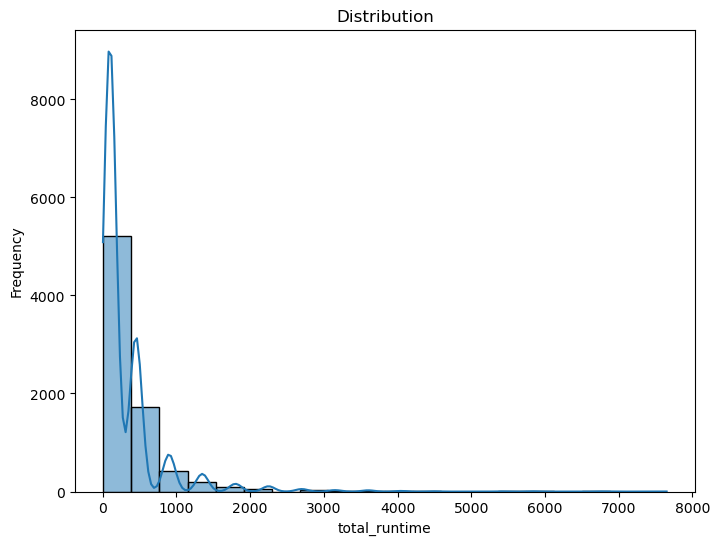

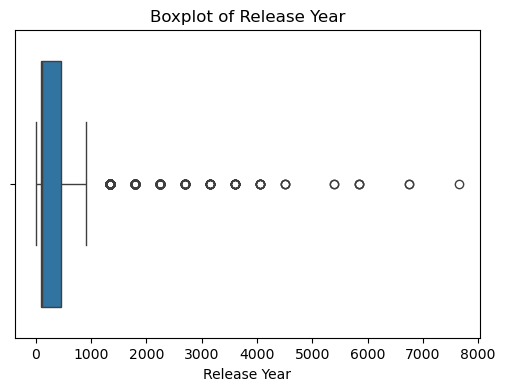

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  
sns.histplot(df['total_runtime'], bins=20, kde=True)  
plt.title("Distribution")  
plt.xlabel("total_runtime")  
plt.ylabel("Frequency") 
plt.show()  

plt.figure(figsize=(6, 4))  
sns.boxplot(x=df['total_runtime'])  
plt.title("Boxplot of Release Year")  
plt.xlabel("Release Year")  
plt.show()  

Data Selection and Wrangling:

o Select a subset of columns relevant to a hypothetical question of
interest (e.g., predicting a target variable).

Does movie runtime vary by category?

o Use .groupby() to aggregate data and calculate mean values for each
category of a selected categorical variable.

In [28]:
#df.to_excel("test.xlsx", index=False)
#df_encoded.to_excel("Hej_encoded.xlsx", index=False)

# Group by 'category' and calculate stats for 'total_runtime'
category_runtime_stats = df.groupby('category')['total_runtime'].agg(['mean', 'median', 'std'])

# Display results
print(category_runtime_stats)

                 mean  median         std
category                                 
High      1435.662651  1350.0  842.804201
Low         41.495349    46.0   14.088919
Medium     194.042308   108.0  154.696999


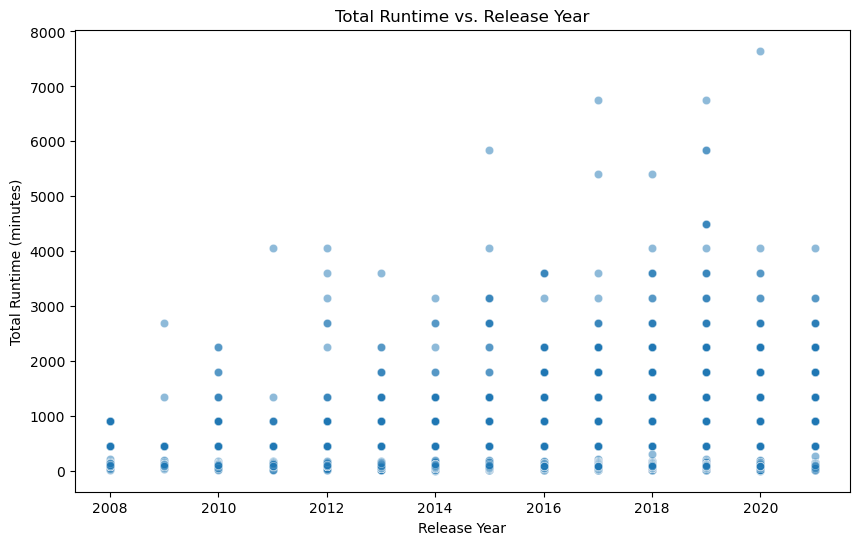

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Scatter plot using seaborn
sns.scatterplot(x=df['release_year'], y=df['total_runtime'], alpha=0.5)

plt.title("Total Runtime vs. Release Year")
plt.xlabel("Release Year")
plt.ylabel("Total Runtime (minutes)")
plt.show()


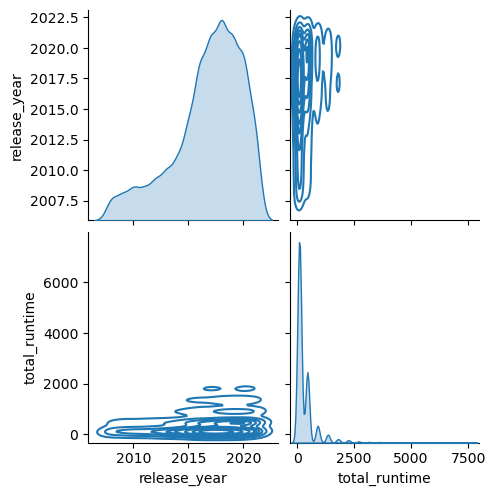

In [30]:
numeric_cols = ['release_year', 'total_runtime']
sns.pairplot(df[numeric_cols], kind="kde")
plt.show()

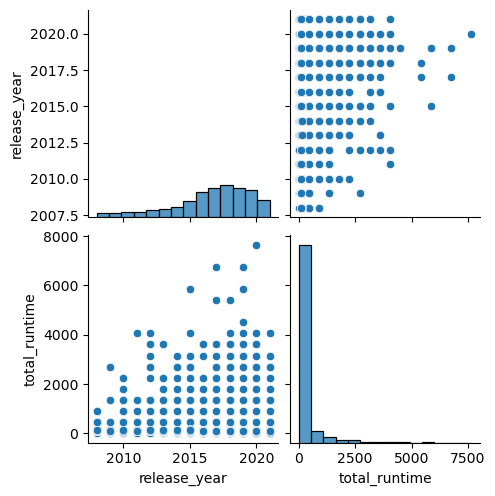

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['release_year', 'total_runtime']

sns.pairplot(df[numeric_cols], diag_kind="hist", diag_kws={'bins': df['release_year'].nunique()})  

plt.show()
